**Wine EDA**

**Dataset**: Wine Quality Dataset
**URL**: https://archive.ics.uci.edu/dataset/186/wine+quality


You can find this dataset on the UCI Machine Learning Repository or from other sources.

**Objective**: Explore and analyze the factors that affect the quality of wines (red and white) using EDA techniques.

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Load the datasets from local storage, beware the separator that it is not a comma but a semicolon

In [16]:
# Load the Wine Quality datasets
# beware the importance of separator
df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

Check the content of the datasets

In [17]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Add a discriminant column for red and white

In [19]:
df_red['type'] = 'red'
df_white['type'] = 'white'

Let's merge those two datasets

In [20]:
# create a single dataframe that includes everything
frames = [df_red, df_white]
df = pd.concat(frames)

Check content

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Check for missing values

In [22]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
missing_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [23]:
# Explore basic statistics
summary_stats = df.describe()
summary_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Countplots**

Countplots in Seaborn are used to visualize the frequency of categorical data by displaying the number of occurrences of each category as bars in a bar chart. They are particularly useful for understanding the distribution of categorical variables and spotting any imbalances. Countplots can help identify the most common categories and detect rare or infrequent ones in a dataset.

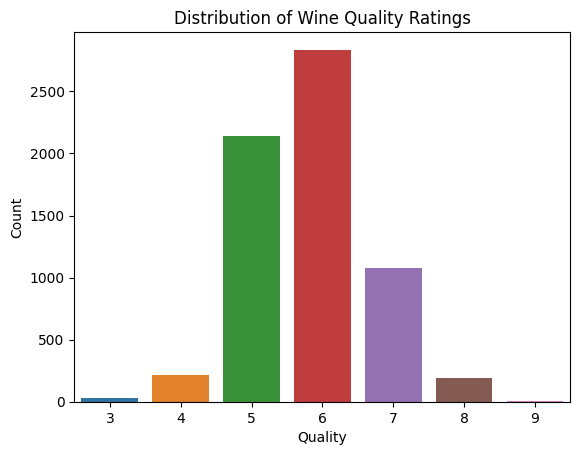

In [24]:
# Visualize the distribution of wine quality ratings
sns.countplot(data=df, x='quality')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

**Pairplots**

Pairplots in Seaborn are grid-like plots used for visualizing pairwise relationships between numerical variables in a dataset. They provide scatter plots in the off-diagonal cells, allowing you to assess correlations and patterns between variables. Along the diagonal, pairplots typically display histograms or kernel density estimates, offering insights into individual variable distributions.

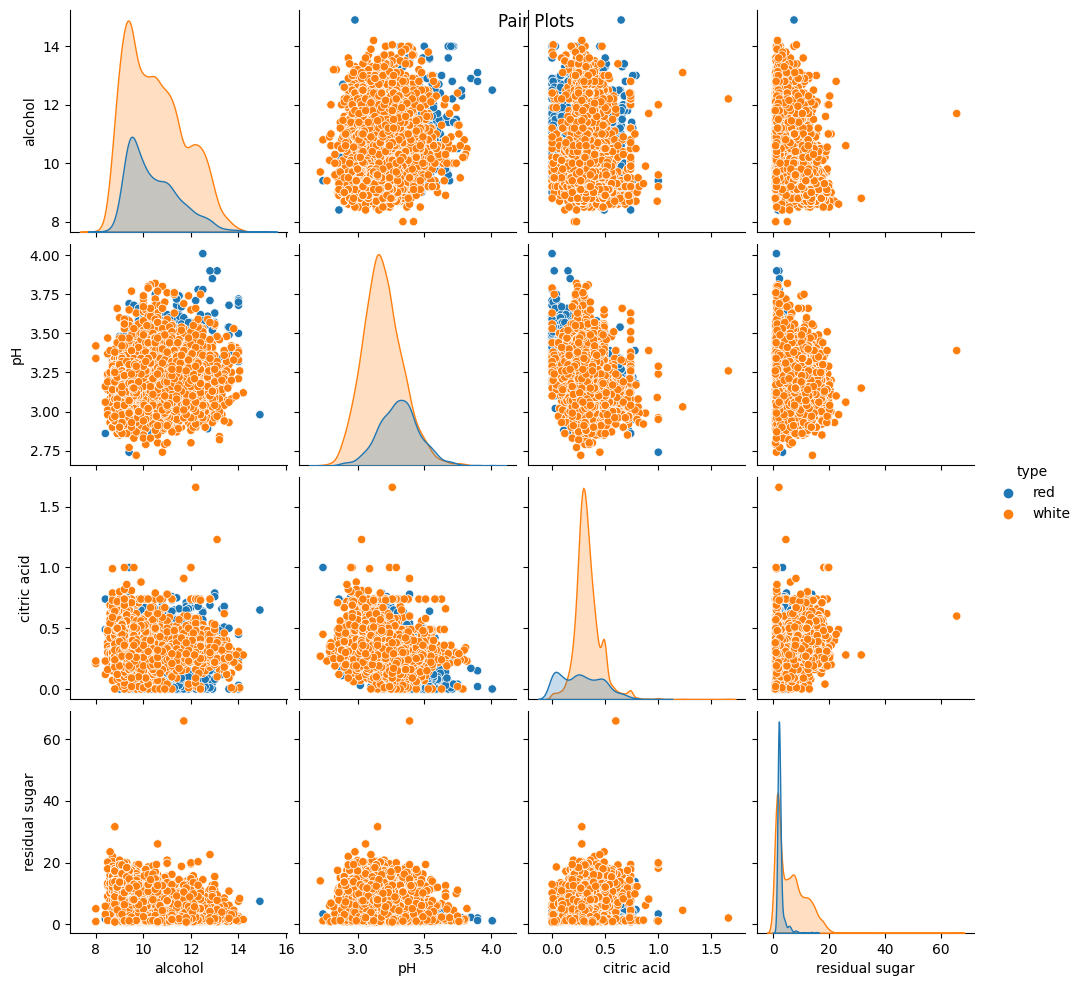

In [25]:
# Pair plots for feature distribution and correlations
sns.pairplot(df, vars=['alcohol', 'pH', 'citric acid', 'residual sugar'], hue='type')
plt.suptitle("Pair Plots")
plt.show()

**Boxplots**

Boxplots, created using Seaborn, are graphical representations of the distribution of numerical data through five key summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. These plots provide a concise way to visualize the central tendency, spread, and potential outliers in a dataset.

In a standard boxplot, a box is drawn from Q1 to Q3, with a horizontal line at the median. The "whiskers" extend from the box to the minimum and maximum values within a specified range, typically defined by a multiplier of the interquartile range (IQR). Data points outside this range are considered outliers and are plotted individually.

Boxplots can be enhanced with features like notches, which provide a visual indication of confidence intervals around the median, and the ability to group boxplots by categorical variables, allowing for easy comparisons between groups.

Overall, boxplots are effective tools for summarizing the distribution of data, detecting skewness, and identifying potential outliers or variations in different groups or categories within a dataset.

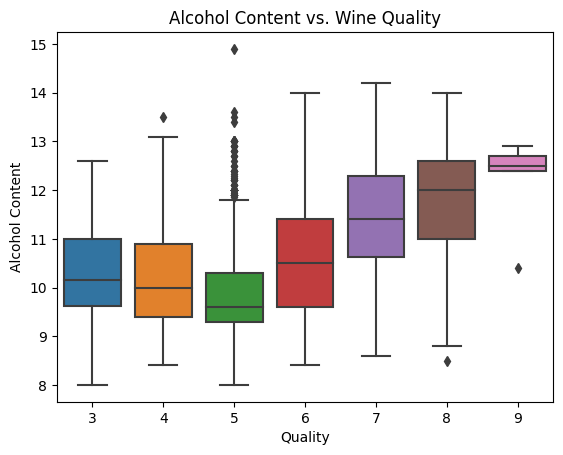

In [26]:
sns.boxplot(data=df, x='quality', y='alcohol')
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

**Heatmap**

A heatmap in Seaborn is a graphical representation of a 2D dataset where individual values are represented as colors in a grid. Heatmaps are particularly useful for visualizing relationships and patterns within complex datasets.

In a typical heatmap, the values of the dataset are mapped to a color scale, where higher values are represented by a different color than lower values. This allows you to quickly identify patterns, trends, and correlations within the data.

Heatmaps are commonly used in data analysis, especially for visualizing correlation matrices, as they provide an efficient way to identify strong positive or negative relationships between variables. They can also help with clustering analysis by revealing similarities in data patterns.

Seaborn's heatmap function provides various customization options, including color palettes, annotations, and hierarchical clustering, making it a versatile tool for exploring and presenting complex data relationships.

<ipython-input-27-06cc3f039abd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


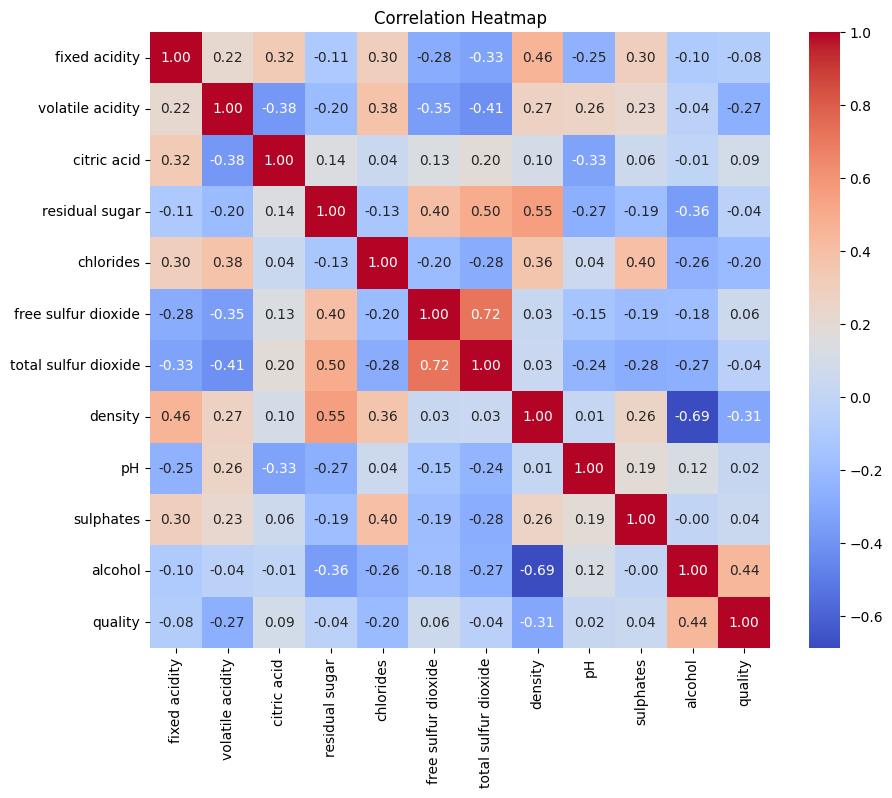

In [27]:
# Heatmap to show correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Histplot**

Histplot is a Seaborn function used for creating histograms, which provide a graphical representation of the distribution of a single numerical variable. It helps you understand the frequency or density of data points within specified bins or intervals.

In a histplot, the x-axis represents the variable's values, and the y-axis represents the frequency or density. You can customize the number of bins to control the level of detail in the histogram, making it suitable for different types of data distributions.

Histplot can also incorporate kernel density estimation (KDE) curves, which provide a smoothed representation of the data's distribution. This helps identify underlying patterns and trends in the data.

Histplot is a versatile tool for initial data exploration, allowing you to quickly assess the shape and characteristics of a numerical variable's distribution. It's often used in combination with other Seaborn functions for comprehensive data analysis and visualization.

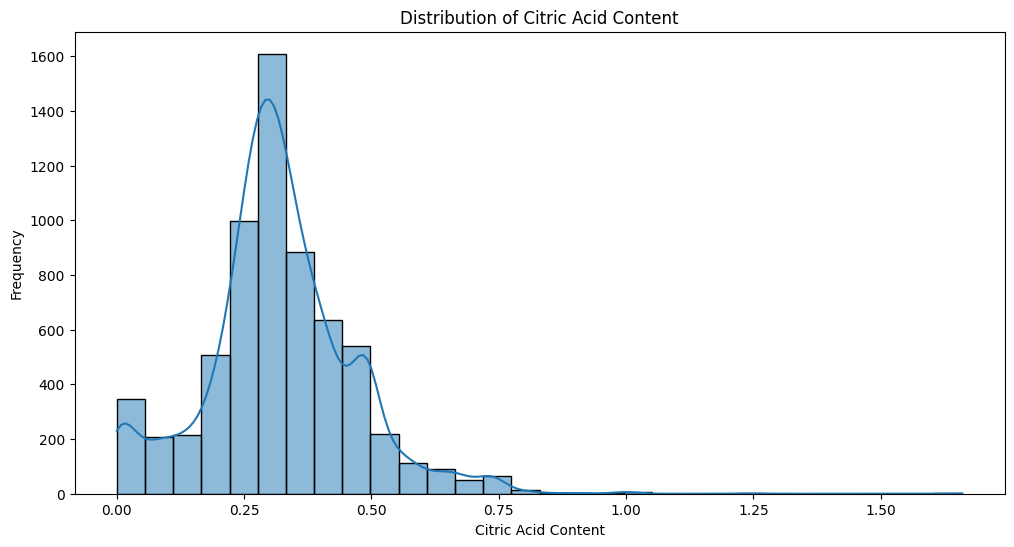

In [28]:
# Histograms and KDE plots for feature distributions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='citric acid', kde=True, bins=30)
plt.title('Distribution of Citric Acid Content')
plt.xlabel('Citric Acid Content')
plt.ylabel('Frequency')
plt.show()

**Feature engineering**

Feature engineering in Exploratory Data Analysis (EDA) is the process of creating new variables or transforming existing ones to extract meaningful information and improve the performance of machine learning models. It involves selecting, modifying, or creating features from raw data to enhance the predictive power of a model. Feature engineering aims to capture relevant patterns, relationships, and domain-specific knowledge that may not be apparent in the original data.

The primary goals of feature engineering are to reduce noise, highlight important signals, and enhance the model's ability to make accurate predictions or uncover insights from the data. Common techniques include creating interaction features, scaling and normalizing variables, handling missing data, encoding categorical variables, and reducing dimensionality through techniques like PCA or feature selection methods.

Effective feature engineering requires a deep understanding of the data and domain knowledge, as well as an iterative and creative approach to experimenting with different feature transformations. It plays a critical role in the success of machine learning projects, as well-constructed features can significantly improve model performance and interpretability.

**Total Acidity**

Let's create a new feature called "total acidity" by summing up the fixed acidity and volatile acidity, which are two important contributors to acidity in wine.

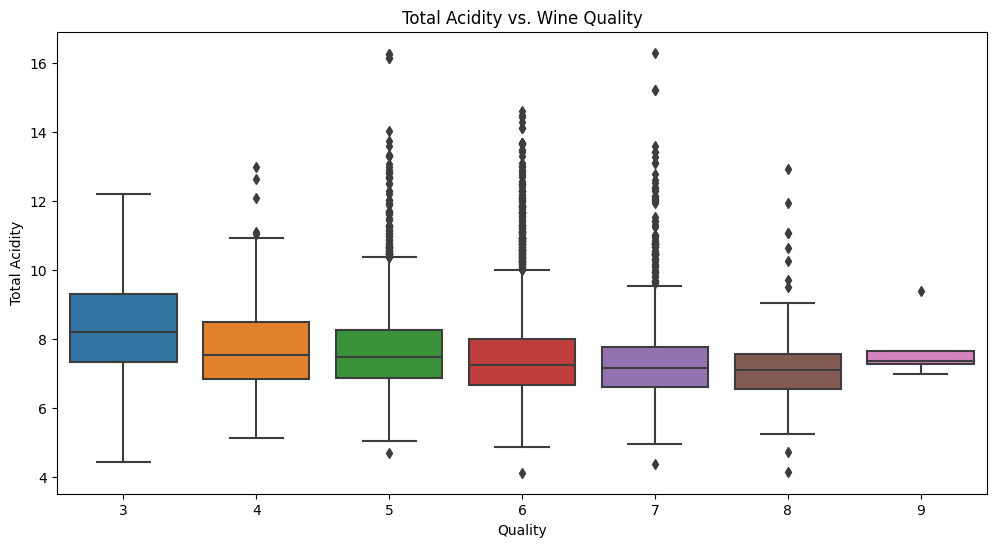

In [29]:
# feature engineering
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']

# Visualize the effect of total acidity on wine quality
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='quality', y='total acidity')
plt.title('Total Acidity vs. Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Total Acidity')
plt.show()

**Residual Sugar to Sweetness**

Create a new feature "sweetness" based on the residual sugar content. Wines with low residual sugar can be considered drier, while wines with higher residual sugar can be sweeter.

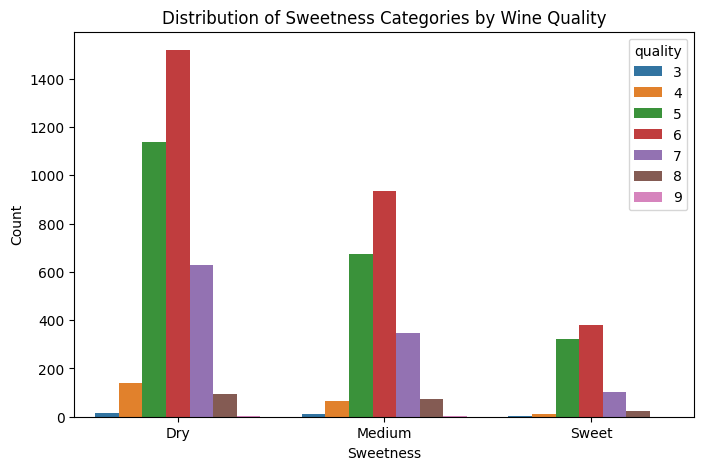

In [30]:
# Define a function to categorize sweetness
def categorize_sweetness(residual_sugar):
    if residual_sugar < 4:
        return 'Dry'
    elif residual_sugar < 12:
        return 'Medium'
    else:
        return 'Sweet'

df['sweetness'] = df['residual sugar'].apply(categorize_sweetness)

# Visualize the distribution of sweetness categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sweetness', hue='quality')
plt.title('Distribution of Sweetness Categories by Wine Quality')
plt.xlabel('Sweetness')
plt.ylabel('Count')
plt.show()


**Alcohol Content Category**

Create a categorical feature to categorize wine by alcohol content as "Low," "Medium," or "High."

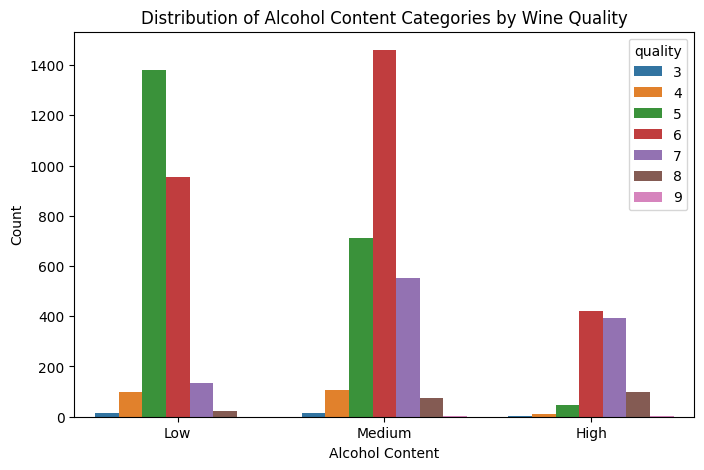

In [31]:
# Define alcohol content categories
def categorize_alcohol_content(alcohol):
    if alcohol < 10:
        return 'Low'
    elif alcohol < 12:
        return 'Medium'
    else:
        return 'High'

df['alcohol_category'] = df['alcohol'].apply(categorize_alcohol_content)

# Visualize the distribution of alcohol content categories by wine quality
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='alcohol_category', hue='quality', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Alcohol Content Categories by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Count')
plt.show()


**Scatterplot**

A scatterplot in Seaborn is a graphical representation that displays individual data points as markers in a two-dimensional coordinate system. It is used to visualize the relationship between two numerical variables and assess their patterns and correlations.

In a scatterplot, one variable is typically represented on the x-axis, and the other on the y-axis. Each data point is plotted at the intersection of these two axes, allowing you to observe how changes in one variable relate to changes in the other.

Scatterplots can reveal various patterns, including linear, nonlinear, clustered, or dispersed relationships between variables. Seaborn offers customization options to enhance scatterplots, such as adding color, size, and transparency to data points, which can help differentiate and highlight aspects of the data.

Scatterplots are useful in exploratory data analysis (EDA) for identifying trends, outliers, or clusters in data, and they are often a first step in understanding the relationship between variables before more complex analyses or modeling is performed.

**Alcohol vs. pH Scatterplot**

Create a scatterplot to visualize the relationship between alcohol content and pH.

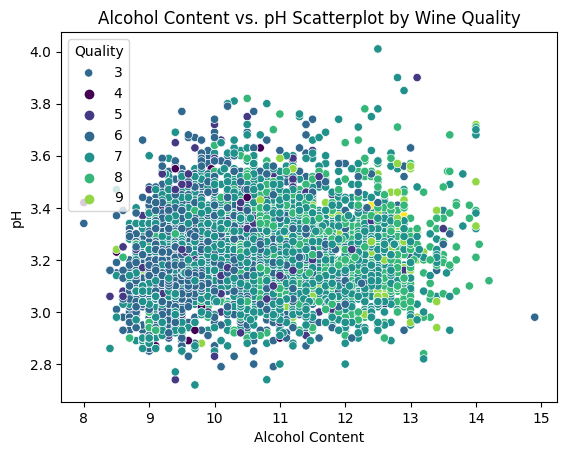

In [32]:
sns.scatterplot(data=df, x='alcohol', y='pH', hue='quality', palette='viridis')
plt.title('Alcohol Content vs. pH Scatterplot by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.legend(title='Quality', loc='upper left', labels=[3, 4, 5, 6, 7, 8, 9])
plt.show()

**Jointplot**

A jointplot in Seaborn is a versatile visualization that combines several graphical representations to help analyze the relationship between two numerical variables. It provides a comprehensive view of the data by including scatterplots, histograms, kernel density estimates (KDE), and correlation coefficients.

In a jointplot, the central area displays a scatterplot of the two variables, showing individual data points and their distribution. The margins of the plot contain histograms (for each variable) and KDE plots (kernel density estimates) to visualize their univariate distributions.

The jointplot can also include regression lines or kernel density contours to emphasize the relationship between the variables. The correlation coefficient, such as Pearson's r, is typically displayed to quantify the strength and direction of the relationship.

Jointplots are particularly useful for understanding bivariate relationships, identifying patterns, and assessing the correlation between two variables in a single compact visualization, making them a valuable tool in exploratory data analysis (EDA).

**Citric Acid vs. Residual Sugar Hexbin Plot**

Explore the relationship between citric acid and residual sugar using a hexbin plot.

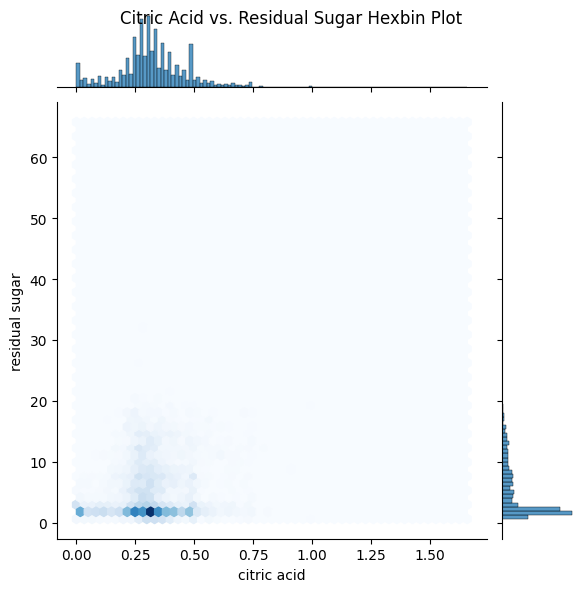

In [33]:
sns.jointplot(data=df, x='citric acid', y='residual sugar', kind='hex', cmap='Blues')
plt.suptitle('Citric Acid vs. Residual Sugar Hexbin Plot')
plt.show()


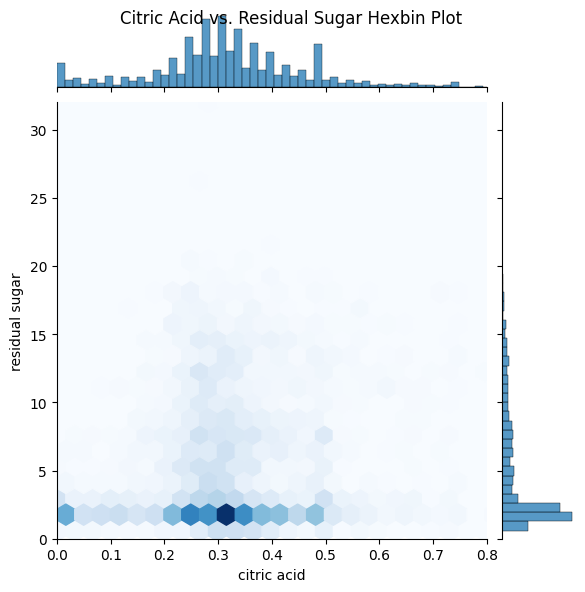

In [35]:
sns.jointplot(data=df, x='citric acid', y='residual sugar', kind='hex', cmap='Blues')
plt.suptitle('Citric Acid vs. Residual Sugar Hexbin Plot')
plt.ylim(0, 32)
plt.xlim(0, 0.8)
plt.show()